## 1. 사용할 패키지 불러오기

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 2. Otsu Segmentation

### (1) Original Image

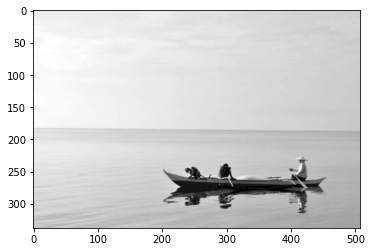

In [4]:
image = cv2.imread("./example_data/otsu_image2.PNG", 0)
plt.imshow(image, cmap = 'gray')

### (2) Pixel histogram

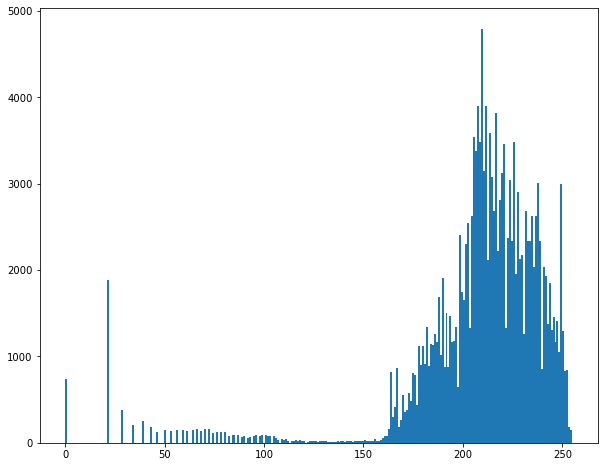

In [5]:
plt.figure(figsize=(10,8))
plt.hist(image.ravel(),256)
plt.show()

### (3) Otsu Segmentation

In [6]:
threshold, otsu_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Otsu Segmentation Threshold: {}".format(threshold))

Otsu Segmentation Threshold: 133.0


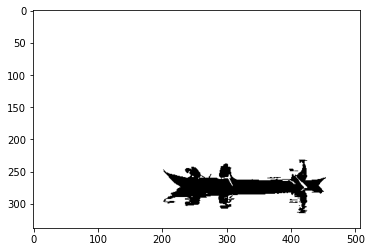

In [7]:
plt.imshow(otsu_image, cmap = 'gray')

### (1) Original Image

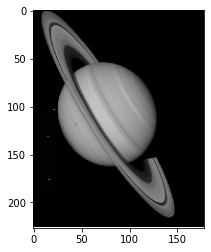

In [8]:
image = cv2.imread("./example_data/otsu_image1.PNG", 0)
plt.imshow(image, cmap = 'gray')

### (2) Pixel histogram

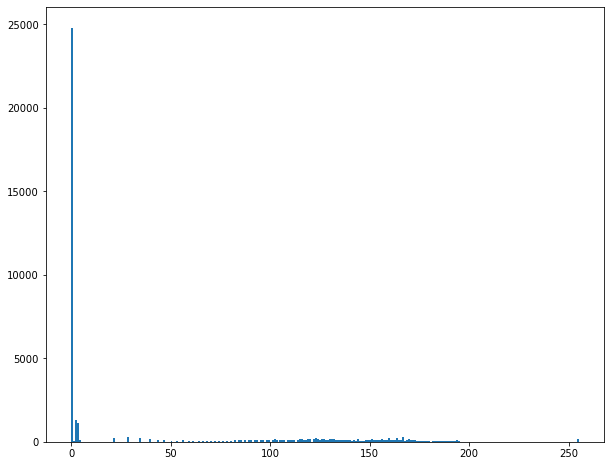

In [9]:
plt.figure(figsize=(10,8))
plt.hist(image.ravel(),256)
plt.show()

### (3) Otsu Segmentation

In [10]:
threshold, otsu_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Otsu Segmentation Threshold: {}".format(threshold))

Otsu Segmentation Threshold: 68.0


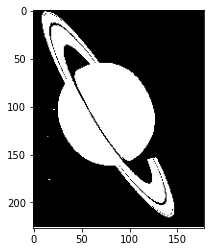

In [11]:
plt.imshow(otsu_image, cmap = 'gray')

## 3. Connected component

#### cv2.connectedComponents(image, labels = None, connectivity = None, ltype = None)

- image: 8비트 1채널 영상
- labels: 레이블 맵 행렬
- connectivity: 4 또는 8. 기본 값은 8
- ltype: labels 타입

In [12]:
def connected_component_label(path):
    
    # Getting the input image
    img = cv2.imread(path, 0)
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
    # Applying cv2.connectedComponents() 
    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()

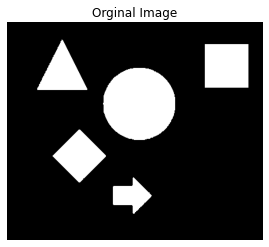

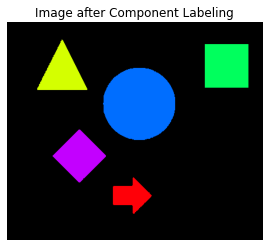

In [14]:
connected_component_label("./example_data/connected_component_image1.PNG")

## 4. Gamma correction

In [18]:
def gamma_correction(image, gamma):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [36]:
image = cv2.imread("./example_data/otsu_image2.PNG", 1)

### (1) Gamma < 1

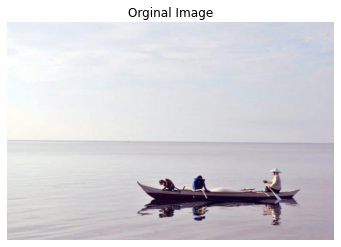

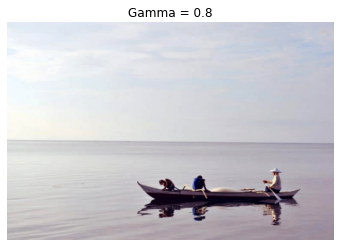

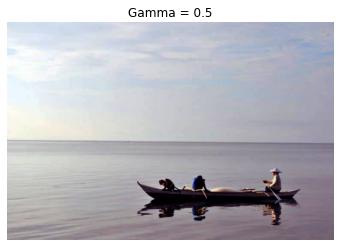

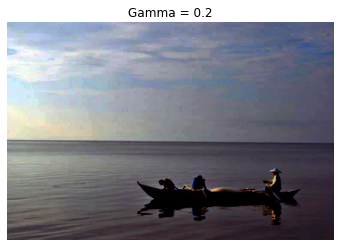

In [30]:
# Showing Original Image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()
    
# Gamma = 0.8
plt.imshow(cv2.cvtColor(gamma_correction(image, 0.8), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Gamma = 0.8")
plt.show()

# Gamma = 0.8
plt.imshow(cv2.cvtColor(gamma_correction(image, 0.5), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Gamma = 0.5")
plt.show()

# Gamma = 0.8
plt.imshow(cv2.cvtColor(gamma_correction(image, 0.2), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Gamma = 0.2")
plt.show()

### (2) Gamma > 1

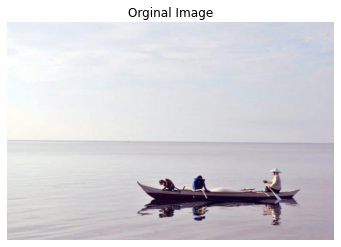

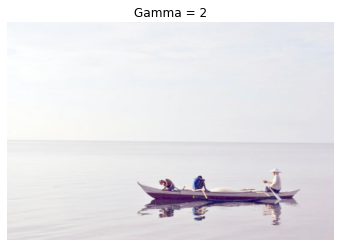

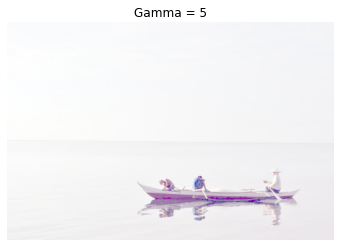

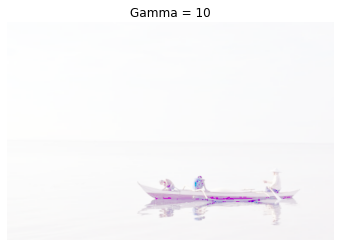

In [28]:
# Showing Original Image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()
    
# Gamma = 0.8
plt.imshow(cv2.cvtColor(gamma_correction(image, 2), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Gamma = 2")
plt.show()

# Gamma = 0.8
plt.imshow(cv2.cvtColor(gamma_correction(image, 5), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Gamma = 5")
plt.show()

# Gamma = 0.8
plt.imshow(cv2.cvtColor(gamma_correction(image, 10), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Gamma = 10")
plt.show()

## 5. Convolution

### (1) Original Image

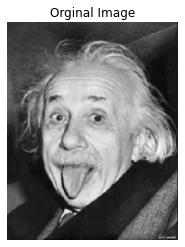

In [62]:
image = cv2.imread("./example_data/convolution_image1.PNG", 0)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.title("Orginal Image")
plt.show()

### (2) Edge extraction Kernel

In [63]:
kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])
print(kernel)

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


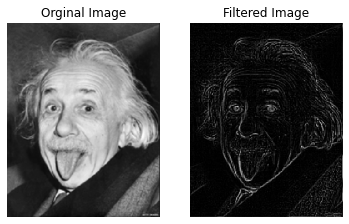

In [64]:
result = cv2.filter2D(image, -1, kernel)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(result, cmap = 'gray')
ax2.set_title('Filtered Image')
ax2.axis("off")

plt.show()

### (3) Gaussian Blur Kernel

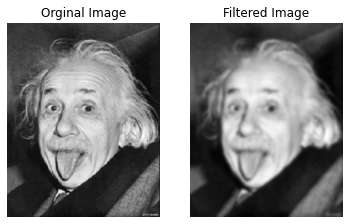

In [65]:
result = cv2.GaussianBlur(image, (15,15), 0)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(result, cmap = 'gray')
ax2.set_title('Filtered Image')
ax2.axis("off")

plt.show()

### (4) Clear Image Kernel

In [66]:
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
print(kernel)

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


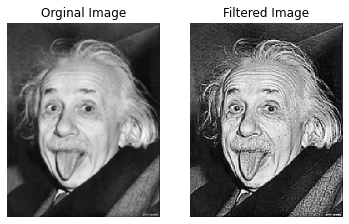

In [67]:
result = cv2.filter2D(image, -1, kernel)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(result, cmap = 'gray')
ax2.set_title('Filtered Image')
ax2.axis("off")

plt.show()

## 6. Interpolation

### (1) Original Image

Original Image Size: 612 X 612


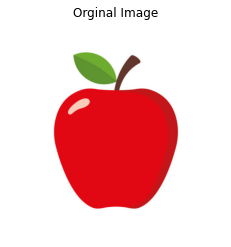

In [15]:
image = cv2.imread("./example_data/interpolation_ex1.jpg", 1)

print("Original Image Size: {} X {}".format(image.shape[0], image.shape[1]))

# Showing Original Image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()

### cv2.resize(img, dsize, fx, fy, interpolation)

- img: Image
- dsize: Manual Size. 가로, 세로 형태의 tuple
- fx: 가로 사이즈 배수. 2배로 크게하려면 2
- fy: 세로 사이즈 배수. 2배로 크게하려면 2
- interpolation: 보간법

### (2) Nearest Neighbor Interpolation

- 가장 가까운 화소값을 사용

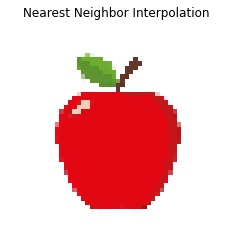

In [9]:
interpolated_image = cv2.resize(image, (50,50), interpolation = cv2.INTER_NEAREST)

# Showing Interpolated Image
plt.imshow(cv2.cvtColor(interpolated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Nearest Neighbor Interpolation")
plt.show()

### (3) Bilinear Interpolation

- 인접한 4개의 화소값과 거리비를 사용하여 결정

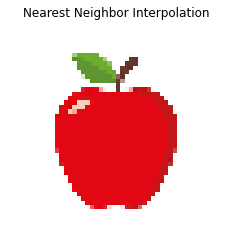

In [10]:
interpolated_image = cv2.resize(image, (50,50), interpolation = cv2.INTER_LINEAR)

# Showing Interpolated Image
plt.imshow(cv2.cvtColor(interpolated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Nearest Neighbor Interpolation")
plt.show()

### (4) Bicubic Interpolation

- 인접한 16개의 화소값과 거리에 따른 가중치의 곱을 사용하여 결정

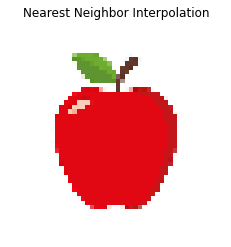

In [11]:
interpolated_image = cv2.resize(image, (50,50), interpolation = cv2.INTER_CUBIC)

# Showing Interpolated Image
plt.imshow(cv2.cvtColor(interpolated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Nearest Neighbor Interpolation")
plt.show()

## 7. Morphology

### (1) Original Image

Original Image Size: 225 X 225


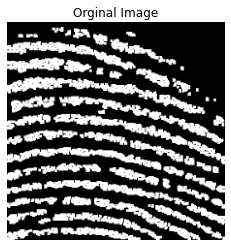

In [17]:
image = cv2.imread("./example_data/morphology_ex2.png", 0)

print("Original Image Size: {} X {}".format(image.shape[0], image.shape[1]))

# Showing Original Image
plt.imshow(image, cmap = 'gray')
plt.axis("off")
plt.title("Orginal Image")
plt.show()

### (2) Morphology 구조 요소(커널) 생성

#### cv2.getStructuringElement(shape, ksize, anchor=None)

- shape : 구조 요소 모양을 나타내는 플래그.

        cv2.MORPH_RECT: 사각형 모양
        cv2.MORPH_CROSS: 십자가 모양
        cv2.MORPH_ELLIPSE: 사각형에 내접하는 타원


- ksize : 구조 요소 크기. (width, height) 튜플.
- anchor : MORPH_CROSS 모양의 구조 요소에서 고정점 좌표. (-1, -1)을 지정하면 구조 요소의 중앙을 고정점으로 사용.

In [34]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

### (3) Erode

#### cv2.erode(src, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None)
- src : 입력 영상
- kernel : 구조 요소. getStructuringElement() 함수에 의해 생성 가능. 만약 None을 지정하면 3x3 사각형 구성 요소를 사용.
- dst : 출력 영상. src와 동일한 크기와 타입.
- anchor : 고정점 위치. 기본값 (-1, -1)을 사용하면 중앙점을 사용.
- iterations : 반복 횟수. 기본값은 1.
- borderType : 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT.
- borderValue : cv2.BORDER_CONSTANT인 경우, 확장된 가장자리 픽셀을 채울 값.

In [35]:
erode_img1 = cv2.erode(image, se, iterations = 1)
erode_img2 = cv2.erode(image, se, iterations = 2)
erode_img3 = cv2.erode(image, se, iterations = 3)

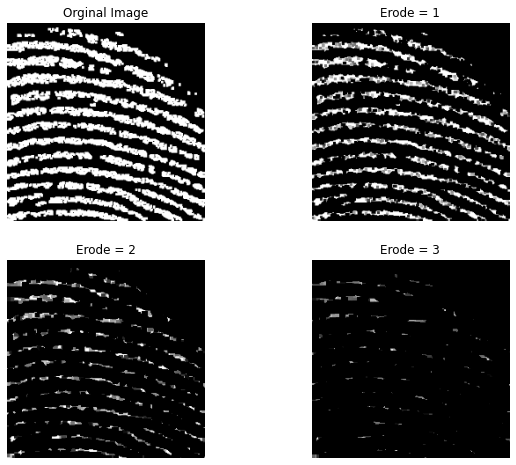

In [36]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(erode_img1, cmap = 'gray')
ax2.set_title('Erode = 1')
ax2.axis("off")

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(erode_img2, cmap = 'gray')
ax3.set_title('Erode = 2')
ax3.axis("off")

ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(erode_img3, cmap = 'gray')
ax4.set_title('Erode = 3')
ax4.axis("off")
plt.show()

### (4) Dilate

#### cv2.dilate(src, kernel, dst=None, anchor=None, iterations=None, borderType=None, borderValue=None)
- src : 입력 영상
- kernel : 구조 요소. getStructuringElement() 함수에 의해 생성 가능. 만약 None을 지정하면 3x3 사각형 구성 요소를 사용.
- dst : 출력 영상. src와 동일한 크기와 타입.
- anchor : 고정점 위치. 기본값 (-1, -1)을 사용하면 중앙점을 사용.
- iterations : 반복 횟수. 기본값은 1.
- borderType : 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT.
- borderValue : cv2.BORDER_CONSTANT인 경우, 확장된 가장자리 픽셀을 채울 값.

In [37]:
dilate_img1 = cv2.dilate(image, se, iterations = 1)
dilate_img2 = cv2.dilate(image, se, iterations = 2)
dilate_img3 = cv2.dilate(image, se, iterations = 3)

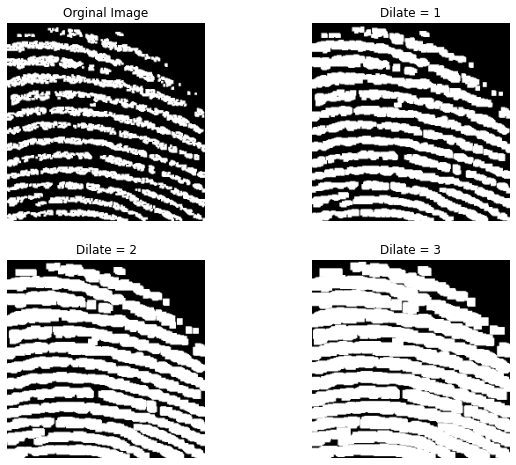

In [38]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(dilate_img1, cmap = 'gray')
ax2.set_title('Dilate = 1')
ax2.axis("off")

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(dilate_img2, cmap = 'gray')
ax3.set_title('Dilate = 2')
ax3.axis("off")

ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(dilate_img3, cmap = 'gray')
ax4.set_title('Dilate = 3')
ax4.axis("off")
plt.show()

## 8. Edge detection

### (1) Original Image

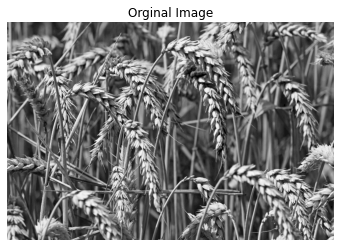

In [39]:
image = cv2.imread("./example_data/edge_extract_ex1.PNG", 0)

# Showing Original Image
plt.imshow(image, cmap = 'gray')
plt.axis("off")
plt.title("Orginal Image")
plt.show()

### (2) Sobel Filter

#### cv2.Sobel(src, ddepth, dx, dy, ksize, scale, delta, borderType)
- src: 입력 이미지
- ddepth: 출력 이미지의 데이터 타입 (-1은 입력 이미지와 동일한 타입을 의미)
- dx: X축 방향 미분 차수
- dy: Y축 방향 미분 차수
- ksize: Sobel 마스크의 크기 
- ...

In [41]:
sobel_x = cv2.Sobel(image, cv2.CV_8U, dx = 1, dy = 0, ksize = 3)
sobel_y = cv2.Sobel(image, cv2.CV_8U, dx = 0, dy = 1, ksize = 3)

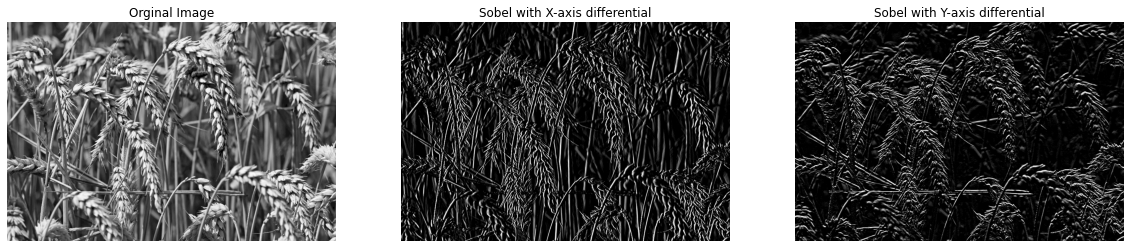

In [43]:
fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(sobel_x, cmap = 'gray')
ax2.set_title('Sobel with X-axis differential')
ax2.axis("off")

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(sobel_y, cmap = 'gray')
ax3.set_title('Sobel with Y-axis differential')
ax3.axis("off")

plt.show()

### (3) Laplacian Filter

#### cv2.laplacian(src, ddepth, ksize, scale, delta, borderType)
- src: 입력 이미지
- ddepth: 출력 이미지의 데이터 타입 (-1은 입력 이미지와 동일한 타입을 의미)
- ksize: Sobel 마스크의 크기 
- ...

In [44]:
laplacian = cv2.Laplacian(image, cv2.CV_8U, ksize = 3)

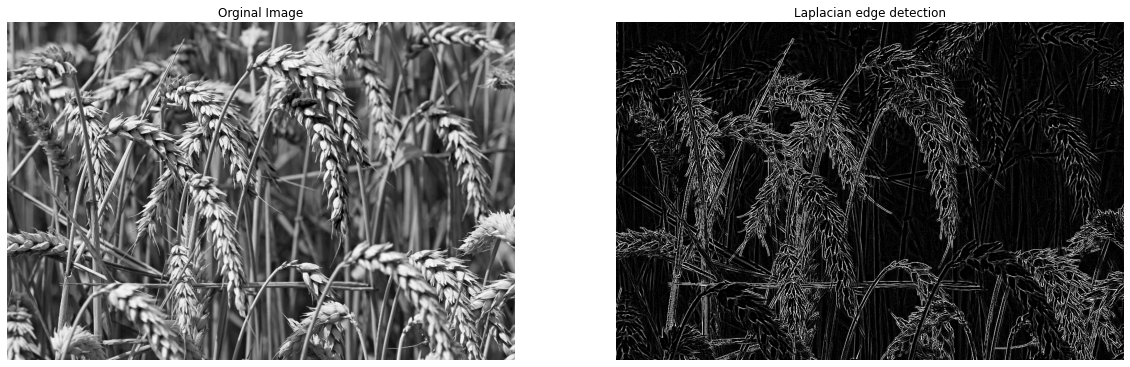

In [45]:
fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(laplacian, cmap = 'gray')
ax2.set_title('Laplacian edge detection')
ax2.axis("off")

plt.show()

### (4) Canny Filter

#### cv2.Canny(src, threshold1, threshold2, apertureSize, L2gradient)
- src: 입력 이미지
- threshold1: 하위 임계값
- threshold2: 상위 임계값 
        하위 임곗값과 상위 임곗값으로 픽셀이 갖는 최솟값과 최댓값을 설정해 검출을 진행
        픽셀이 상위 임곗값보다 큰 기울기를 가지면 픽셀을 가장자리로 간주하고, 하위 임곗값보다 낮은 경우 가장자리로 고려하지 않음.
- apertureSize: 소벨 연산을 활용하므로, 소벨 마스크의 크기를 설정
- L2gradient: L2-norm으로 방향성 그레이디언트를 정확하게 계산할지, 정확성은 떨어지지만 속도가 더 빠른 L1-norm으로 계산할지를 선택

In [46]:
canny = cv2.Canny(image, 100, 255)

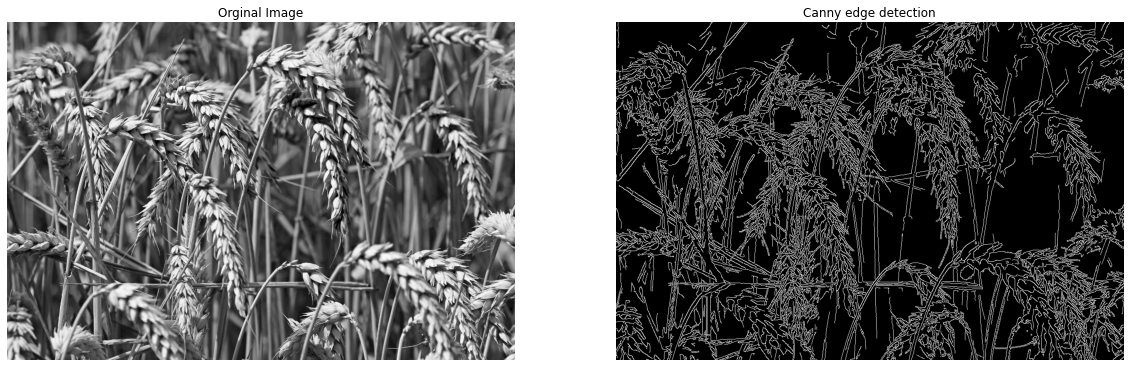

In [47]:
fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(canny, cmap = 'gray')
ax2.set_title('Canny edge detection')
ax2.axis("off")

plt.show()